## Loading a Lunar crater database

For some general intro online planetary data access, please see e.g. 

https://github.com/europlanet-gmap/winter-school-2023/blob/main/gmap-tools/notebooks/download_data_from_zenodo_record.ipynb

Using existing publicly available crater databases with desktop GIS or alike should be straighforward.

This notebook is not exhaustive and should not be used withouht thorugh check for any scholarly work.

Also, unlike the nomenclature-derived databases (rather small), this notebook does not ship data. Data sources are listed in [planetary_craters.ipynb](./planetary_craters.ipynb), and ref. therein. Most are available from USGS Astropedia - https://astrogeology.usgs.gov/search


<div class="alert alert-block alert-warning">
    CAVEAT: Those are large files sometimes, with millions of records (e..g Robbins has ~1.3M. The files are in perfect shape on the servers (e.g .USGS). Downloading, despite the fact that they are zipped, might actually corrupt just one of them (!), depending potentially on network issues while downloading the zip archive. This can be affecting only one file, and it happened in one earlier iterations of this notebook. 
    
https://superuser.com/questions/1490438/are-zip-files-vulnerable-to-corruption   
</div>


<div class="alert alert-block alert-info">
    MITIGATION: Integrity check TBA / TBD
    
https://github.com/europlanet-gmap/winter-school-2023/tree/main/crs
</div>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Robbins 2018 database

i.e. https://astrogeology.usgs.gov/search/map/Moon/Research/Craters/lunar_crater_database_robbins_2018

described in Robbins (2019)



In [2]:
# load robbins database

input_robbins_moon = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Moon_Robbins/lunar_crater_database_robbins_2018_bundle/data/lunar_crater_database_robbins_2018.csv'

In [3]:
# moon_robbins=pd.read_csv(input_robbins_moon, skiprows=[292757, 292758, 
#                                                        292767, 292771, 
#                                                        292774, 292775,
#                                                       292779, 292801,
#                                                       292812, 292817,
#                                                       292835])

moon_robbins=pd.read_csv(input_robbins_moon,  on_bad_lines='skip')  # skips
# moon_robbins=pd.read_csv(input_robbins_moon,  error_bad_lines=False) # skips and shows the errors



In [4]:
# so just a subset was loaded, of the 1.3 million craters... 
moon_robbins.shape

(1296796, 21)

In [5]:
moon_robbins.loc[292755]

CRATER_ID                 03-1-020123
LAT_CIRC_IMG                 -6.00282
LON_CIRC_IMG                  193.071
LAT_ELLI_IMG                 -6.00261
LON_ELLI_IMG                  193.071
DIAM_CIRC_IMG                 3.00599
DIAM_CIRC_SD_IMG             0.051924
DIAM_ELLI_MAJOR_IMG           3.05837
DIAM_ELLI_MINOR_IMG           2.94211
DIAM_ELLI_ECCEN_IMG          0.273097
DIAM_ELLI_ELLIP_IMG           1.03952
DIAM_ELLI_ANGLE_IMG           166.479
LAT_ELLI_SD_IMG              0.000461
LON_ELLI_SD_IMG              0.000464
DIAM_ELLI_MAJOR_SD_IMG       0.034629
DIAM_ELLI_MINOR_SD_IMG       0.035615
DIAM_ELLI_ANGLE_SD_IMG        13.1758
DIAM_ELLI_ECCEN_SD_IMG       0.056167
DIAM_ELLI_ELLIP_SD_IMG        0.01723
ARC_IMG                      0.876888
PTS_RIM_IMG                        23
Name: 292755, dtype: object

In [7]:
# this is perfectly fine, but in an earlier case of corrupt download, the file started to raise issues at this line

moon_robbins.loc[292757] 

CRATER_ID                 03-1-020126
LAT_CIRC_IMG                 -6.36288
LON_CIRC_IMG                   192.42
LAT_ELLI_IMG                 -6.36298
LON_ELLI_IMG                   192.42
DIAM_CIRC_IMG                 1.66327
DIAM_CIRC_SD_IMG             0.038575
DIAM_ELLI_MAJOR_IMG           1.75792
DIAM_ELLI_MINOR_IMG           1.56974
DIAM_ELLI_ECCEN_IMG           0.45015
DIAM_ELLI_ELLIP_IMG           1.11988
DIAM_ELLI_ANGLE_IMG           82.7552
LAT_ELLI_SD_IMG              0.000253
LON_ELLI_SD_IMG              0.000234
DIAM_ELLI_MAJOR_SD_IMG       0.018777
DIAM_ELLI_MINOR_SD_IMG       0.016986
DIAM_ELLI_ANGLE_SD_IMG        4.54162
DIAM_ELLI_ECCEN_SD_IMG       0.026933
DIAM_ELLI_ELLIP_SD_IMG       0.017028
ARC_IMG                           1.0
PTS_RIM_IMG                        12
Name: 292757, dtype: object

In [70]:
# drop rows fro the first error 
# this is obviously not needed as the file is perfectly OK
# moon_robbins = moon_robbins.drop(moon_robbins.index[292755:])

In [9]:
# load every 100th record, for ease of visualisation
# please do not do this for doing any science, it is just not to clog jupyter in-line. 
# Qgis should digest this easily

moon_robbins_subset = moon_robbins.iloc[::100, :]


<AxesSubplot: xlabel='LON_CIRC_IMG', ylabel='LAT_CIRC_IMG'>

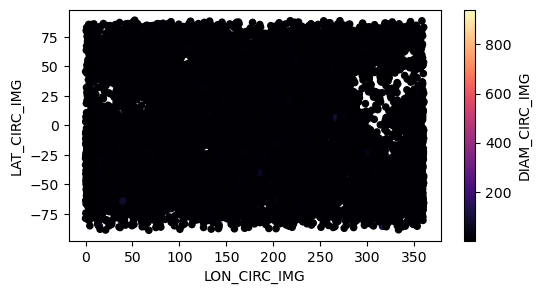

In [10]:
moon_robbins_subset.plot.scatter(x='LON_CIRC_IMG',y='LAT_CIRC_IMG',c='DIAM_CIRC_IMG', cmap='magma', figsize=(6, 3))

In [14]:
# loading Robbins moon databas in shapefile
# https://astrogeology.usgs.gov/search/map/Moon/Research/Craters/lunar_crater_database_robbins_2018

# load robbins shapefile/geopackage database

input_robbins_gpkg = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Moon_Robbins/Catalog_Moon_Release_20180815_shapefile180/Catalog_Moon_Release_20180815_1kmPlus_180.shp'
moon_robbins_gpkg=gpd.read_file(input_robbins_gpkg, low_memory=False)

    # <Field name="CRATER_ID" type="String" width="12" src="CRATER_ID" />
    # <Field name="LAT_ELLI_IMG" type="Real" src="LAT_EL_IM" />
    # <Field name="LON_ELLI_IMG" type="Real" src="LON_EL_IM" />
    # <Field name="DIAM_CIRC_IMG" type="Real" src="DIAM_C_IM" />
    # <Field name="DIAM_CIRC_SD_IMG" type="Real" src="D_C_SD_IM" />
    # <Field name="DIAM_ELLI_MAJOR_IMG" type="Real" src="D_E_MA_IM" />
    # <Field name="DIAM_ELLI_MINOR_IMG" type="Real" src="D_E_MI_IM" />
    # <Field name="DIAM_ELLI_ECCEN_IMG" type="Real" src="D_E_EC_IM" />
    # <Field name="DIAM_ELLI_ELLIP_IMG" type="Real" src="D_E_ELP_IM" />
    # <Field name="DIAM_ELLI_ANGLE_IMG" type="Real" src="D_E_ANG_IM" />
    # <Field name="LAT_ELLI_SD_IMG" type="Real" src="LAT_E_SDI" />
    # <Field name="LON_ELLI_SD_IMG" type="Real" src="LON_E_SDI" />
    # <Field name="DIAM_ELLI_MAJOR_SD_IMG" type="Real" src="D_E_MA_SDI" />
    # <Field name="DIAM_ELLI_MINOR_SD_IMG" type="Real" src="D_E_MI_SDI" />
    # <Field name="DIAM_ELLI_ANGLE_SD_IMG" type="Real" src="D_E_AN_SDI" />
    # <Field name="DIAM_ELLI_ECCEN_SD_IMG" type="Real" src="D_E_EC_SDI" />
    # <Field name="DIAM_ELLI_ELLIP_SD_IMG" type="Real" src="D_E_EL_SDI" />
    # <Field name="ARC_IMG" type="Real" src="ARC_IMG" />
    # <Field name="PTS_RIM_IMG" type="Real" src="PTS_RIM_IM" />

In [15]:
moon_robbins_gpkg.head()

,CRATER_ID,LAT_EL_IM,LON_EL_IM,DIAM_C_IM,D_C_SD_IM,D_E_MA_IM,D_E_MI_IM,D_E_EC_IM,D_E_ELP_IM,D_E_ANG_IM,LAT_E_SDI,LON_E_SDI,D_E_MA_SDI,D_E_MI_SDI,D_E_AN_SDI,D_E_EC_SDI,D_E_EL_SDI,ARC_IMG,PTS_RIM_IM,geometry
0,00-1-000000,-19.89050,264.6650,940.960,21.31790,975.874,905.968,0.371666,1.07716,35.9919,0.007888,0.008424,0.636750,0.560417,0.373749,0.002085,0.000968,0.568712,8088.0,POINT (-95.24300 -19.83040)
1,00-1-000001,44.40830,329.0460,249.840,5.99621,289.440,245.786,0.528111,1.17761,127.0030,0.011178,0.015101,1.052780,0.209035,0.357296,0.005100,0.004399,0.627328,2785.0,POINT (-31.39800 44.77630)
2,00-1-000002,56.90000,81.6464,599.778,21.57900,632.571,561.435,0.460721,1.12670,149.1620,0.008464,0.019515,0.776149,0.747352,0.374057,0.003095,0.002040,0.492373,5199.0,POINT (82.09950 57.08660)
3,00-1-000003,1.95072,230.5880,558.762,14.18190,568.529,546.378,0.276416,1.04054,133.6910,0.007079,0.007839,0.526945,0.532872,1.262710,0.004496,0.001400,0.595221,4341.0,POINT (-129.37800 1.96124)
4,00-1-000004,-49.18330,266.3530,654.332,17.50970,665.240,636.578,0.290365,1.04502,87.6468,0.008827,0.017733,0.568958,0.758631,1.383530,0.004626,0.001533,0.545924,5933.0,POINT (-93.65300 -49.14960)


In [19]:
moon_robbins_gpkg.shape

(1296796, 20)

In [20]:
# load every 100th record, for ease of visualisation

moon_robbins_gpkg_subset = moon_robbins_gpkg.iloc[::100, :]


<AxesSubplot: xlabel='LON_EL_IM', ylabel='LAT_EL_IM'>

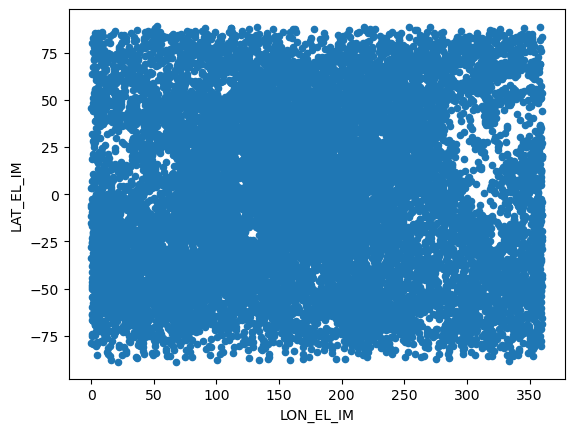

In [21]:
# plot - something is not digeted by pandas, and goes off expected lat, lon ranges
moon_robbins_gpkg_subset.plot.scatter(x='LON_EL_IM', y='LAT_EL_IM')

In [22]:
# plot a realistic range of lat, lon. It shows some issues in parsing data

# fig = plt.figure()
# ax = plt.subplot(111)
# moon_robbins_gpkg_subset.plot(x='LON_EL_IM',y='LAT_EL_IM',ax=ax, kind='scatter')
# ax.set_xlim(0,360)
# ax.set_ylim(-90,90)



### Loading Wang 2020 database

i.e. https://zenodo.org/record/4983248#.Y_x3ly8w1qs

see also Wang et al. (2021)


In [23]:
# loading wang  moon database
# https://zenodo.org/record/4983248#.Y_25by8w1qt

# load wang database
# skipping header
# (base) /V/u/d/0/c/Moon_wang ❯❯❯ cat -n LU1319373_Wang\ \&\ Wu_2021.txt
    #  1	Lunar Global Crater Catalog LU1319373 (Crater Diameter ≥1 km) 
    #  2	-----------------------------------------------------------------------------------------------------------------------------
    #  3	Description of the fields:
    #  4	ID: A unified identification of the crater.
    #  5	Longitude and Latitude: Geographic coordinates of the crater center in decimal degrees.
    #  6	Diameter: The diameter of the crater in meters.
    #  7	Depth: The depth of the crater in meters, as measured from global lunar DEMs (Barker et al., 2016; Smith et al., 2010). Gaussian fits to crater profiles are used to assess crater depths, and the resulting values may not be wholly accurate in the case of partially overlapping craters.
    #  8	Source: Origin information of the crater 
    #  9	           0: The entry is from this catalog (Wang and Wu, 2021);
    # 10	           1: The entry is transferred from Robbins (2019) with a rim-fitting process;
    # 11	           2: The entry is transferred from Head et al. (2010) with a rim-fitting process;
    # 12	           3: The entry is transferred from Robbins (2019) without rim-fitting;
    # 13	           4: The entry is transferred from Head et al. (2010) without rim-fitting.
    # 14	Source_lon, Soure_lat, Source_dia: The original geographic coordinates and diameters of craters in Robbins (2019) if the "Source" is 1 or 3, and in Head et al. (2010) if the "Source" is 2 or 4. For the entries from this catalog, these fields are marked as 0.
    # 15	-----------------------------------------------------------------------------------------------------------------------------
    # 16	
    # 17	ID	Lonitude(degree)	Latitude(degree)	Diameter(m)	Depth(m)	Source	Source_lon(degree)	Soure_lat(degree)	Source_dia(m)
    # 18	1	-180.0000	11.9500	2755.8	120.0	0	0.0000	0.0000	0.0


    

input_wang_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Moon_wang/LU1319373_Wang & Wu_2021.txt'

In [24]:
moon_wang=pd.read_table(input_wang_mars, skiprows=16)  # skips
# rename "Lonitude" to "Longitude"
moon_wang.rename(columns={'Lonitude(degree)': 'Longitude(degree)'}, inplace=True)
moon_wang.head()

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m)
0,1,-180.0,11.9500,2755.8,120.0,0,0.0,0.0000,0.0
1,2,-180.0,12.1700,3061.2,194.5,0,0.0,0.0000,0.0
2,3,-180.0,10.0700,5882.0,369.5,0,0.0,0.0000,0.0
3,4,-180.0,20.0910,1503.0,72.5,1,0.0,20.0910,1503.4
4,5,-180.0,9.6476,3900.0,347.5,1,180.0,9.6476,3899.7


In [25]:
moon_wang.shape

(1319373, 9)

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

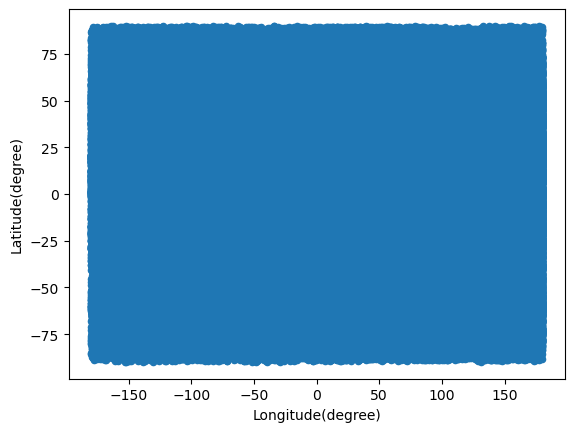

In [26]:
moon_wang.plot.scatter(x='Longitude(degree)', y='Latitude(degree)')

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

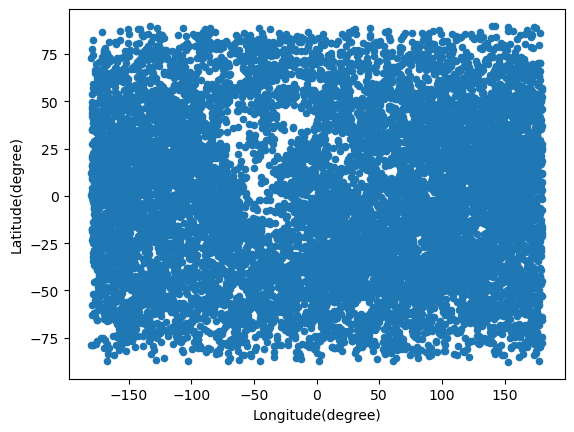

In [27]:
# decimating, for speed

moon_wang_decimated = moon_wang.iloc[::100, :]
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)')

#### Filtering by diameter, or depth


In [28]:
moon_wang_decimated.query("`Diameter(m)` > 10000").head()

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m)
1900,1901,-179.3140,46.1191,12789.9,491.5,1,-179.32,46.123,12299.0
2100,2101,-179.2524,2.1233,16873.4,1087.8,0,0.00,0.000,0.0
2900,2901,-179.0280,54.0170,12506.0,1525.8,0,0.00,0.000,0.0
5000,5001,-178.4910,-51.9778,18432.4,1454.0,0,0.00,0.000,0.0
6100,6101,-178.1826,-2.9894,19338.8,496.4,0,0.00,0.000,0.0


In [29]:
# how many craters in there? (please note they are decimated here for speed/ease)
moon_wang_decimated.query("`Diameter(m)` > 10000").shape

(250, 9)

In [30]:
# how many craters in there? full dataset
moon_wang.query("`Diameter(m)` > 10000").shape

(24978, 9)

In [31]:
#### Filtering by depth, e.g. deeper than 3 km )decimated dataset)
moon_wang_decimated.query("`Depth(m)` > 3000")

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m)
45800,45801,-167.8338,-0.2905,62693.8,4647.4,1,-167.8600,-0.2893,58466.0
83200,83201,-158.3913,-26.5830,19626.3,3335.0,0,0.0000,0.0000,0.0
96300,96301,-155.2134,48.5826,73520.0,4060.1,1,-155.2360,48.5683,71879.1
144200,144201,-143.1670,-28.1278,33571.2,3478.1,1,-143.1840,-28.1175,32899.5
155700,155701,-140.2134,-16.5267,37676.5,3667.0,1,-140.2170,-16.4987,37305.2
169000,169001,-136.6339,23.1861,184230.2,5905.1,1,-136.5290,23.1619,182581.0
188800,188801,-131.1737,15.6311,20806.2,3841.3,1,-131.1580,15.6204,21522.2
199900,199901,-128.0214,24.0510,20244.9,3334.6,2,-128.0600,24.0940,21640.0
224000,224001,-121.2523,-57.1431,43997.3,3281.0,1,-121.3180,-57.1152,43545.5
258200,258201,-110.7294,4.4193,17654.4,3012.1,2,-110.6600,4.5269,22868.0


#### Filtering by bounding box


In [32]:
moon_wang_decimated.query("`Longitude(degree)` >= 158 and `Longitude(degree)` < 160 and `Latitude(degree)` > 10 and `Latitude(degree)` < 20" )

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m)
1230400,1230401,158.553,10.9594,2116.6,283.4,0,0.0,0.0,0.0
1232100,1232101,158.977,11.2600,1312.7,73.3,0,0.0,0.0,0.0


<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

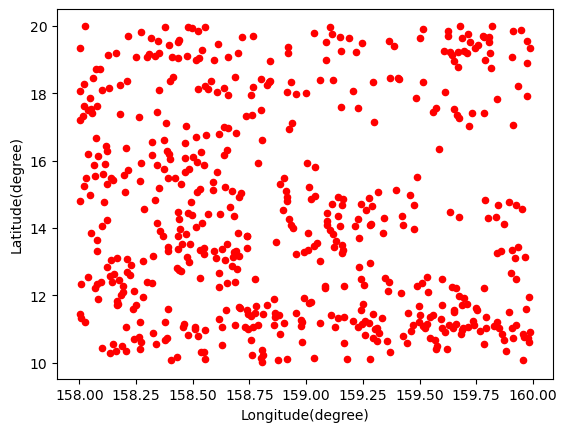

In [33]:
query_bounding_box = "`Longitude(degree)` >= 158 and `Longitude(degree)` < 160 and `Latitude(degree)` > 10 and `Latitude(degree)` < 20"


moon_wang.query(query_bounding_box).plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red')

## Loading a Mars crater database

In [34]:
# load robbins database

input_robbins_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mars_Robbins/RobbinsCraterDatabase_20120821/RobbinsCraterDatabase_20120821_LatLonDiam.shp'

In [35]:
mars_robbins=gpd.read_file(input_robbins_mars)


<AxesSubplot: >

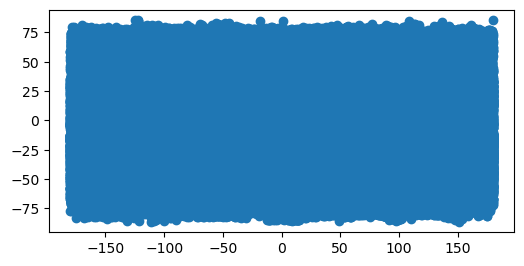

In [36]:
mars_robbins.plot(figsize=(6,3))

In [37]:
# load lagain database
# see also https://github.com/alagain/martian_crater_database

input_lagain_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mars_Lagain/lagain_db/lagain_db.shp'

In [38]:
mars_lagain=gpd.read_file(input_lagain_mars)


In [39]:
mars_lagain.head()

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
0,200-007,500.0,23.671499,-43.584301,1.0,Valid,None,None,1.0,POINT (23.67150 -43.58430)
1,200-008,500.0,68.432404,-39.950500,1.0,Valid,None,None,1.0,POINT (68.43240 -39.95050)
2,200-009,500.0,177.154007,-0.758709,1.0,Valid,None,None,1.0,POINT (177.15401 -0.75871)
3,200-010,500.0,34.128899,-31.406401,1.0,Valid,None,None,1.0,POINT (34.12890 -31.40640)
4,100-001,500.0,-52.963100,47.302601,1.0,Valid,None,None,1.0,POINT (-52.96310 47.30260)


<AxesSubplot: xlabel='X', ylabel='Y'>

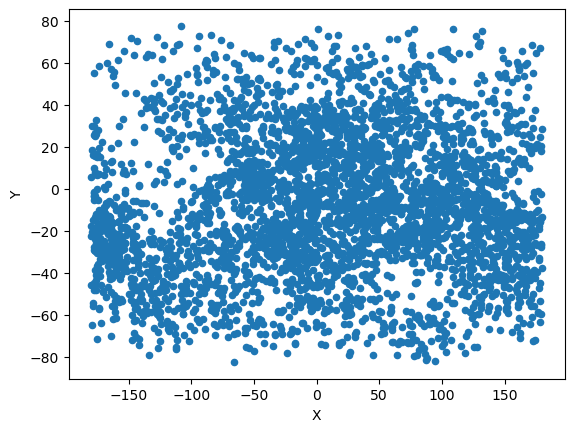

In [40]:
# decimating, for speed

mars_lagain_decimated = mars_lagain.iloc[::100, :]
mars_lagain_decimated.plot.scatter(x='X', y='Y')

<AxesSubplot: >

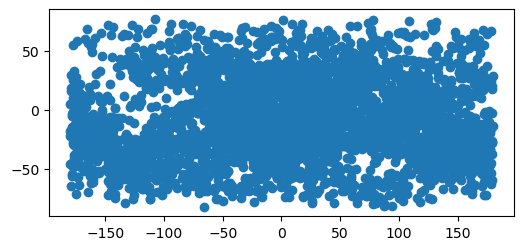

In [41]:
mars_lagain_decimated.plot(figsize=(6,3))

### Searching for specific crater types

e.g. on Lagain database, looking for rampart craters.



In [42]:
# looking for unique values
print(mars_lagain['LRD_MORPH'].unique())

[None 'SLE' 'DLE' 'LARLE' 'MLE']


I.e. from Lagain et al. (2021):

* SLE: Single Layer Ejecta
* DLE: Double Layer Ejecta
* LARLE: Low-aspect-ratio layered ejecta 
* MLE: Multiple layers ejecta

In [43]:
SLE = mars_lagain.query("`LRD_MORPH` == 'SLE'")

In [44]:
SLE.head()

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
205,100-102,780.0,150.218994,65.888397,2.0,Layered,SLE,None,1.0,POINT (150.21899 65.88840)
206,200-004,2760.0,-89.203796,-3.367010,2.0,Layered,SLE,None,1.0,POINT (-89.20380 -3.36701)
290019,13-013914,500.0,83.822998,20.825001,2.0,Layered,SLE,None,0.0,POINT (83.82300 20.82500)
290020,01-006292,505.0,45.923000,73.681999,2.0,Layered,SLE,None,0.0,POINT (45.92300 73.68200)
290021,01-006313,505.0,-169.205002,69.660004,2.0,Layered,SLE,None,0.0,POINT (-169.20500 69.66000)


In [45]:
DLE = mars_lagain.query("`LRD_MORPH` == 'DLE'")
SLE.head()

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
205,100-102,780.0,150.218994,65.888397,2.0,Layered,SLE,None,1.0,POINT (150.21899 65.88840)
206,200-004,2760.0,-89.203796,-3.367010,2.0,Layered,SLE,None,1.0,POINT (-89.20380 -3.36701)
290019,13-013914,500.0,83.822998,20.825001,2.0,Layered,SLE,None,0.0,POINT (83.82300 20.82500)
290020,01-006292,505.0,45.923000,73.681999,2.0,Layered,SLE,None,0.0,POINT (45.92300 73.68200)
290021,01-006313,505.0,-169.205002,69.660004,2.0,Layered,SLE,None,0.0,POINT (-169.20500 69.66000)


<AxesSubplot: xlabel='X', ylabel='Y'>

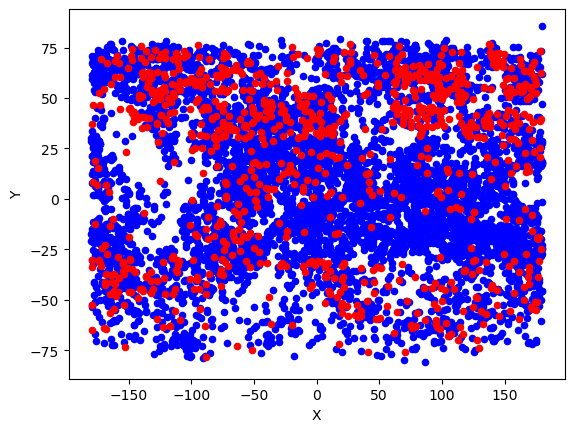

In [46]:
ax = SLE.plot.scatter(x='X', y='Y', color='blue')
DLE.plot.scatter(x='X', y='Y', color='red', ax=ax)

# References

Lagain, A., Bouley, S., Baratoux, D., Marmo, C., Costard, F., Delaa, O., Rossi, A. P., Minin, M., Benedix, G.K., Ciocco, M. Bedos, B., Guimpier, A., Dehouck, E., Loizeau, D., Bouquety, A., Zhao, J., Vialatte, A., et al. (2021) “Mars Crater Database: A Participative Project for the Classification of the Morphological Characteristics of Large Martian Craters.” In Large Meteorite Impacts and Planetary Evolution VI, edited by Wolf Uwe Reimold and Christian Koeberl, 629–44. Geological Society of America. DOI: 10.1130/2021.2550(29). - https://doi.org/10.1130/2021.2550(29)

Robbins, S. J., & Hynek, B. M. (2012). A New Global Database of Mars Impact Craters ≥1 km: 1. Database Creation, Properties, and Parameters. Journal of Geophysical Research: Planets, 117(E5). https://doi.org/10.1029/2011JE003966

Robbins, S. J. (2019). A new global database of lunar impact craters> 1–2 km: 1. Crater locations and sizes, comparisons with published databases, and global analysis. Journal of Geophysical Research: Planets, 124(4), 871-892. - https://doi.org/10.1029/2018JE005592

Wang, Y., Wu, B., Xue, H., Li, X., & Ma, J. (2021). An improved global catalog of lunar impact craters (≥1 km) with 3D morphometric information and updates on global crater analysis. Journal of Geophysical Research: Planets, 126, e2020JE006728. - https://doi.org/10.1029/2020JE006728